<a href="https://colab.research.google.com/github/Cordobes1974/DataScience/blob/main/ProyectoDS_ParteI_Rodrigo_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
# Imports de bibliotecas para manipulación de datos y visualización y machine learning
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

# Imports de bibliotecas para modelado y aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
import sklearn.datasets

import seaborn as sns

# Para el uso de Técnicas de Remuestreo como SMOTE
from imblearn.over_sampling import SMOTE

# Para hacer algún ajuste de hiperparámetros:
from sklearn.model_selection import GridSearchCV

# Configuración del entorno de Python en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Hipótesis.**

Seguiré éstos pasos:

1) Definir el objetivo de la Hipótesis.

Quiero calcular el "Costo que tendría el Servicio para el Hospital", como "Variable Objetivo".

También deseo investigar o demostrar, por ejemplo: Poder analizar si ciertos factores, influyen en la recuperación de pacientes, con una enfermedad específica.

Cúales Enfermedades se dan en mayor cantidad?

Hay vinculación con La Edad y/o el Género de los Pacientes?


2) Seleccionar las variables: Identificar las variables dependientes e independientes en el dataset. Por ejemplo, tener variables como edad, género, historial médico, tratamientos recibidos, etc.

3) Formular la Hipótesis: Redactar una hipótesis clara y comprobable.

4) Preparar el Dataset: Trabajaré para asegurarme de que el dataset esté limpio y listo para el análisis.
Esto incluye manejar datos faltantes, normalizar variables, tratar los Outliers, (Para que no distorsionen el análisis), etc.

5) Análisis de Datos: Utilizar Técnicas Estadísticas, para analizar los datos y probar la Hipótesis.

6) Interpretar los resultados: Analizar los resultados obtenidos, para ver si apoyan o refutan mi hipótesis.

Asegurarme de considerar posibles sesgos o limitaciones en el análisis.



---


**A continuación, incluyo una breve explicación de cada Variable:**

Name:                   Nombre del Paciente

Age:                    Edad del Paciente

Gender:                 Género del Paciente

Blood Type:             Tipo de Sangre.

Medical Condition:      Condición Médica.

Date of Admission:      Fecha de Ingreso.

Doctor:                 Doctor que lo atiende.

Hospital:              Hospital en que ha sido internado.

Insurance Provider:     Proveedor de Seguros.

Billing Amount:        Monto de Facturación.

Room Number:            Número de Habitación.

Admission Type:         Tipo de Admisión.

Discharge Date:         Fecha de alta.

Medication:             Medicamento.

Test Results:           Resultados de la prueba.

# **Aclaraciones:**
Dadas las hipótesis planteadas, las variables más interesantes para analizar serían:

**Analizar si ciertos factores influyen en la recuperación de pacientes con una enfermedad específica:**

Medical Condition: La condición médica es crucial para entender qué factores influyen en la recuperación.

Age: La edad puede ser un factor determinante en la recuperación de ciertas enfermedades.

Gender: El género también puede influir en la respuesta a tratamientos y la recuperación.

Admission Type: El tipo de admisión (emergencia, urgente, electiva) podría estar relacionado con la gravedad de la condición y afectar la recuperación.

Test Results: Los resultados de pruebas médicas pueden ser indicadores importantes de la progresión de la enfermedad y la efectividad del tratamiento.

Medication: Los medicamentos administrados pueden ser analizados para entender su impacto en la recuperación.

Discharge Date: La fecha de alta puede ser utilizada para calcular el tiempo de recuperación y analizar su relación con otros factores.

**Para analizar qué enfermedades se dan en mayor cantidad:**

Medical Condition: Esta variable nos permitirá identificar las enfermedades más frecuentes en el conjunto de datos.

**Para analizar la vinculación con la edad y el género:**

Age: La edad nos permitirá analizar la distribución de enfermedades por grupos etarios.

Gender: El género nos ayudará a identificar si existen diferencias en la prevalencia de enfermedades entre hombres y mujeres.

**Para calcular el costo que tendría el servicio para el hospital:**

**Billing Amount: Esta variable representa el costo total de los servicios médicos prestados y es esencial para calcular el costo total para el hospital.**

Admission Type: El tipo de admisión puede estar relacionado con el costo, ya que las admisiones de emergencia suelen ser más costosas.

Medical Condition: El costo del tratamiento puede variar según la condición médica.

**Contexto comercial y analítico:**

Estas variables son relevantes desde un punto de vista comercial y analítico porque:

Permiten identificar factores que influyen en la recuperación de pacientes, lo que puede ayudar a mejorar los tratamientos y reducir los costos.

Ayudan a entender la prevalencia de enfermedades y su relación con la edad y el género, lo que puede ser útil para planificar estrategias de salud pública.

Facilitan el cálculo del costo de los servicios médicos, lo que permite al hospital tomar decisiones informadas sobre la asignación de recursos.

# Obtención del Dataset:

Me ha costado encontrar un dataset completo, que se adecúe a las condiciones requeridas.

Finalmente, he tomado éste Dataset, desde la página web de Kaggle.

En el siguiente Link:
https://www.kaggle.com/datasets/prasad22/healthcare-dataset

Información brindada por el autor del Dataset:

Contexto:
Este conjunto de datos sintéticos de atención médica, se creó para servir como un recurso valioso para los entusiastas de la ciencia de datos, el aprendizaje automático y el análisis de datos. **Está diseñado para imitar datos de atención médica del mundo real**, lo que permite a los usuarios practicar, desarrollar y mostrar sus habilidades de manipulación y análisis de datos en el contexto de la industria de la atención médica.

Inspiración:
La inspiración detrás de este conjunto de datos, se basa en la necesidad de datos sanitarios prácticos y diversos para fines educativos y de investigación. Los datos sanitarios suelen ser sensibles y estar sujetos a normas de privacidad, lo que dificulta su acceso para el aprendizaje y la experimentación.

Para abordar esta brecha, he aprovechado la biblioteca Faker de Python, para generar un conjunto de datos que refleje la estructura y los atributos que se encuentran comúnmente en los registros sanitarios.

Al proporcionar estos datos sintéticos, espero fomentar la innovación, el aprendizaje y el intercambio de conocimientos en el ámbito de la analítica sanitaria.

Dataset Information:
Cada columna proporciona información específica sobre el paciente, su ingreso y los servicios de atención médica brindados, lo que hace que este conjunto de datos sea adecuado para diversas tareas de análisis y modelado de datos en el ámbito de la atención médica.

In [219]:
pathCurso = '/content/drive/MyDrive/COMISION61170-RODRIGOCASAS'

# **Lectura del Dataset o Importación de datos**

In [220]:
# Cambié a Archivo Tipo: Libro de Excel, (Formato .xlsx); habiendo realizado previamente, la Separación de Texto en Columna, (Separado por Comas).
# Con el objetivo de solucionar el inconveniente con múltiples filas NaN.
# Además debí reducir a la mitad, la cantidad de Filas, ya que al realizar el tratamiento y análisis; me quedaba sin RAM en Colab.
df=pd.read_excel(pathCurso+'/healthcare_dataset BACKUP.xlsx')

In [221]:
print(pathCurso + '/healthcare_dataset BACKUP.xlsx')

/content/drive/MyDrive/COMISION61170-RODRIGOCASAS/healthcare_dataset BACKUP.xlsx


# **Análisis inicial del Dataset**

In [222]:
df.head()

,First Name,Last Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,InsuranceProvider,BillingAmount,RoomNumber,AdmissionType,DischargeDate,Medication,TestResults
0,Bobby,Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856281305978100,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie,Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643327286577800,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny,Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955096078842400,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew,Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,3790978240987520,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne,Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238317813937600,458,Urgent,2022-10-09,Penicillin,Abnormal


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         24999 non-null  object        
 1   Last Name          24999 non-null  object        
 2   Age                24999 non-null  int64         
 3   Gender             24999 non-null  object        
 4   BloodType          24999 non-null  object        
 5   MedicalCondition   24999 non-null  object        
 6   DateofAdmission    24999 non-null  datetime64[ns]
 7   Doctor             24999 non-null  object        
 8   Hospital           24999 non-null  object        
 9   InsuranceProvider  24999 non-null  object        
 10  BillingAmount      24999 non-null  int64         
 11  RoomNumber         24999 non-null  int64         
 12  AdmissionType      24999 non-null  object        
 13  DischargeDate      24999 non-null  datetime64[ns]
 14  Medica

In [224]:
index = df.index
print(index)

RangeIndex(start=0, stop=24999, step=1)


In [225]:
df.describe()

,Age,DateofAdmission,BillingAmount,RoomNumber,DischargeDate
count,24999.000000,24999,2.499900e+04,24999.000000,24999
mean,51.696108,2021-10-28 12:20:39.025560832,1.412771e+16,300.260890,2021-11-13 00:07:08.561142528
min,18.000000,2019-05-08 00:00:00,1.442424e+11,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-24 00:00:00,3.613059e+15,201.000000,2020-08-08 12:00:00
50%,52.000000,2021-10-30 00:00:00,7.602571e+15,301.000000,2021-11-14 00:00:00
75%,69.000000,2023-01-28 00:00:00,2.327247e+16,399.000000,2023-02-13 00:00:00
max,85.000000,2024-05-07 00:00:00,8.154156e+16,500.000000,2024-06-05 00:00:00
std,19.580256,NaN,1.381054e+16,115.114697,NaN


In [226]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Contar cada Tipo de Variable
df.dtypes.value_counts()

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (24999, 16)

Nombres de las variables: 
 Index(['First Name', 'Last Name', 'Age', 'Gender', 'BloodType',
       'MedicalCondition', 'DateofAdmission', 'Doctor', 'Hospital',
       'InsuranceProvider', 'BillingAmount', 'RoomNumber', 'AdmissionType',
       'DischargeDate', 'Medication', 'TestResults'],
      dtype='object')

Tipos de datos: 
 First Name                   object
Last Name                    object
Age                           int64
Gender                       object
BloodType                    object
MedicalCondition             object
DateofAdmission      datetime64[ns]
Doctor                       object
Hospital                     object
InsuranceProvider            object
BillingAmount                 int64
RoomNumber                    int64
AdmissionType                object
DischargeDate        datetime64[ns]
Medication                   object
TestResults                  object
dtype: object

Estadísticas descriptivas: 
                 Ag

In [227]:
df.sample(7)

,First Name,Last Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,InsuranceProvider,BillingAmount,RoomNumber,AdmissionType,DischargeDate,Medication,TestResults
11841,Sharon,Jones,75,Female,B+,Diabetes,2020-07-14,Samuel Patton,Cameron-Williams,Medicare,4160669685261550,323,Elective,2020-08-11,Lipitor,Abnormal
15353,Sharon,Sanders,57,Female,O-,Asthma,2021-12-14,Richard Vincent,Romero Inc,UnitedHealthcare,4708399903573940,186,Elective,2022-01-08,Lipitor,Abnormal
1578,Michael,Christian,54,Female,B+,Diabetes,2023-02-28,Marcus Warren,Ltd Austin,Aetna,2766124412668270,451,Urgent,2023-03-11,Paracetamol,Inconclusive
16479,Tanya,Baird,19,Female,O-,Asthma,2020-08-06,Anthony Middleton,PLC Blair,Aetna,21278385006243400,380,Urgent,2020-09-03,Paracetamol,Abnormal
9190,Kenneth,Perez,18,Female,B-,Hypertension,2020-07-13,Jonathan Robinson,"and Sullivan, Anderson Hayes",Blue Cross,378850773240639,486,Urgent,2020-07-28,Paracetamol,Inconclusive
14981,Jessica,Osborne,79,Female,A+,Asthma,2021-09-24,Kathleen Preston,"Stevens Lawrence, Rodriguez and",Blue Cross,1312708984369340,470,Elective,2021-10-10,Aspirin,Normal
12145,Samuel,Carey,73,Female,A+,Obesity,2021-07-11,Michael Schultz,"Owens, Kidd and Cox",UnitedHealthcare,23461659519283900,300,Elective,2021-07-30,Penicillin,Abnormal


In [228]:
df.tail()

,First Name,Last Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,InsuranceProvider,BillingAmount,RoomNumber,AdmissionType,DischargeDate,Medication,TestResults
24994,Tiffany,Boyle,80,Female,A+,Cancer,2021-09-07,Steven Parker,Jackson PLC,Aetna,1662910729312820,399,Urgent,2021-09-24,Ibuprofen,Normal
24995,Jason,Barber,50,Female,AB-,Obesity,2021-11-02,Eric Mendez,Harrison-Melendez,Blue Cross,3446756060165950,198,Emergency,2021-11-11,Penicillin,Normal
24996,Michael,Mooney,69,Male,AB+,Cancer,2020-07-22,Laura Martin,Torres-Jimenez,Medicare,9243881646384610,178,Elective,2020-08-15,Penicillin,Abnormal
24997,Harold,Acosta,82,Female,O-,Asthma,2023-10-23,Mary David,Sons Espinoza and,Aetna,2559003031125610,390,Urgent,2023-10-24,Paracetamol,Inconclusive
24998,Jennifer,Smith,64,Male,B-,Cancer,2019-12-04,Sara Morrison,Johnson-Rosales,Blue Cross,19969318588272000,461,Urgent,2019-12-16,Paracetamol,Normal


In [229]:
df.size

399984

In [230]:
df.index

RangeIndex(start=0, stop=24999, step=1)

In [231]:
df.ndim

2

In [232]:
df

,First Name,Last Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,InsuranceProvider,BillingAmount,RoomNumber,AdmissionType,DischargeDate,Medication,TestResults
0,Bobby,Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856281305978100,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie,Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643327286577800,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny,Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955096078842400,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew,Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,3790978240987520,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne,Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238317813937600,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,Tiffany,Boyle,80,Female,A+,Cancer,2021-09-07,Steven Parker,Jackson PLC,Aetna,1662910729312820,399,Urgent,2021-09-24,Ibuprofen,Normal
24995,Jason,Barber,50,Female,AB-,Obesity,2021-11-02,Eric Mendez,Harrison-Melendez,Blue Cross,3446756060165950,198,Emergency,2021-11-11,Penicillin,Normal
24996,Michael,Mooney,69,Male,AB+,Cancer,2020-07-22,Laura Martin,Torres-Jimenez,Medicare,9243881646384610,178,Elective,2020-08-15,Penicillin,Abnormal
24997,Harold,Acosta,82,Female,O-,Asthma,2023-10-23,Mary David,Sons Espinoza and,Aetna,2559003031125610,390,Urgent,2023-10-24,Paracetamol,Inconclusive


In [233]:
# Calculo las estadísticas descriptivas del dataframe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,24999.0,51.696108,18.0,35.0,52.0,69.0,85.0,19.580256
DateofAdmission,24999,2021-10-28 12:20:39.025560832,2019-05-08 00:00:00,2020-07-24 00:00:00,2021-10-30 00:00:00,2023-01-28 00:00:00,2024-05-07 00:00:00,NaN
BillingAmount,24999.0,14127711482773164.0,144242393735.0,3613059209710200.0,7602570703576840.0,23272474847778900.0,81541564149807104.0,13810537014963580.0
RoomNumber,24999.0,300.26089,101.0,201.0,301.0,399.0,500.0,115.114697
DischargeDate,24999,2021-11-13 00:07:08.561142528,2019-05-09 00:00:00,2020-08-08 12:00:00,2021-11-14 00:00:00,2023-02-13 00:00:00,2024-06-05 00:00:00,NaN


In [234]:
df.describe(include=['object']).T

,count,unique,top,freq
First Name,24999,688,Michael,615
Last Name,24999,1004,Smith,561
Gender,24999,2,Male,12524
BloodType,24999,8,AB+,3170
MedicalCondition,24999,6,Arthritis,4274
Doctor,24999,22096,Michael Smith,11
Hospital,24999,21445,Ltd Smith,21
InsuranceProvider,24999,6,Cigna,5055
AdmissionType,24999,3,Elective,8515
Medication,24999,5,Penicillin,5076


In [235]:
# Agrego StayDuration. Otro parámetro a cruzar, por ejemplo, con Billing Amount
df['StayDuration'] = (df['DischargeDate'] - df['DateofAdmission']).dt.days
print(df['StayDuration'].describe())

count    24999.000000
mean        15.490620
std          8.644589
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: StayDuration, dtype: float64


**Defino Colores y Estilos, antes de realizar gráficos.**

In [236]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

**Cálculo del Costo Total para el Hospital**

In [237]:
costo_total = df['BillingAmount'].sum()
print('{:,}'.format(costo_total))

2,690,521,957,364,844,397


Cálculo del Costo Total para el Hospital,
Agrupación por diferentes Categorías, **(por Condición Médica).**

In [238]:
costo_por_condicion = df.groupby('MedicalCondition')['BillingAmount'].sum()
costo_por_condicion_formateado = costo_por_condicion.apply('{:,}'.format)
print(costo_por_condicion_formateado)

MedicalCondition
Arthritis       4,847,688,873,881,365,308
Asthma          2,486,396,356,089,029,687
Cancer          2,864,787,209,464,263,339
Diabetes        3,448,804,847,901,741,981
Hypertension    4,544,522,496,212,492,009
Obesity         2,945,066,247,525,503,689
Name: BillingAmount, dtype: object


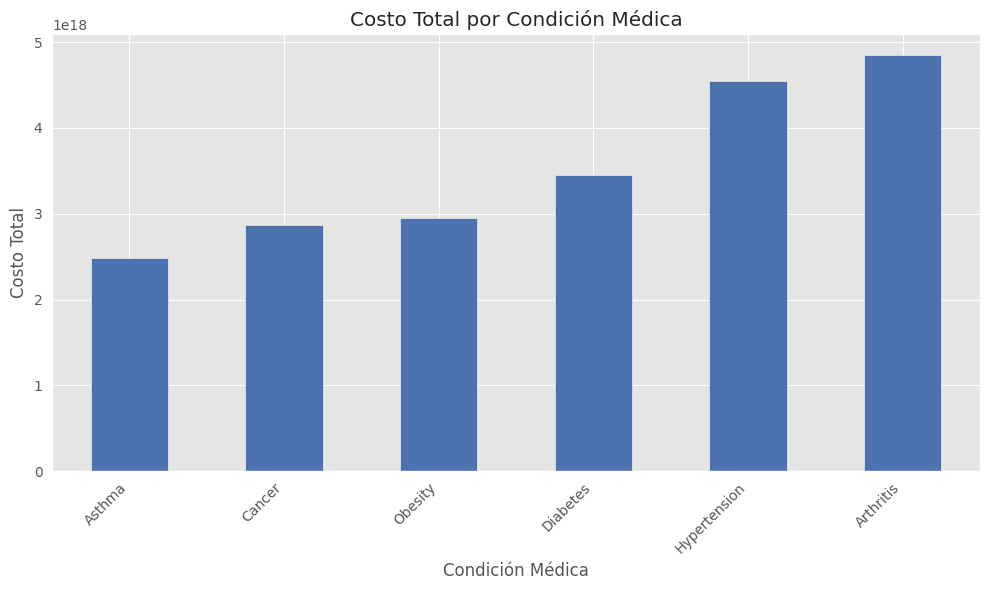

In [239]:
import matplotlib.pyplot as plt

costo_por_condicion = df.groupby('MedicalCondition')['BillingAmount'].sum()


plt.figure(figsize=(10, 6))  # Ajusto el tamaño del gráfico
costo_por_condicion.sort_values().plot(kind='bar')
plt.xlabel('Condición Médica')
plt.ylabel('Costo Total')
plt.title('Costo Total por Condición Médica')
plt.xticks(rotation=45, ha='right')  # Roto las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajusto el diseño, para evitar superposiciones
plt.show()

# **PREPROCESAMIENTO DE DATOS**

# Aclaración sobre la Eliminación de Valores NaN (Not a Number).
**Previamente, había verificado una gran cantidad de datos NaN, (18.635); (Con el Formato.csv).**

Donde salvo el campo 'Name', (Con Cero valor faltante); en los otros datos o celdas, se mantenía la misma cantidad de faltantes. **Era Constante**.

En principio, decidí eliminarlos, ya que entorpecían al modelo con el que estoy trabajando.

**Finalmente, para solucionarlo, cambié el Formato a Excel, (.xlsx) y de esa manera, quedó solucionado.**

# **Limpieza y transformación de datos**

**Valores Duplicados**

In [240]:
df.duplicated().sum()

0

**Valores Nulos**

In [241]:
df.isnull().sum()

,0
First Name,0
Last Name,0
Age,0
Gender,0
BloodType,0
MedicalCondition,0
DateofAdmission,0
Doctor,0
Hospital,0
InsuranceProvider,0


# **Valores Outliers**

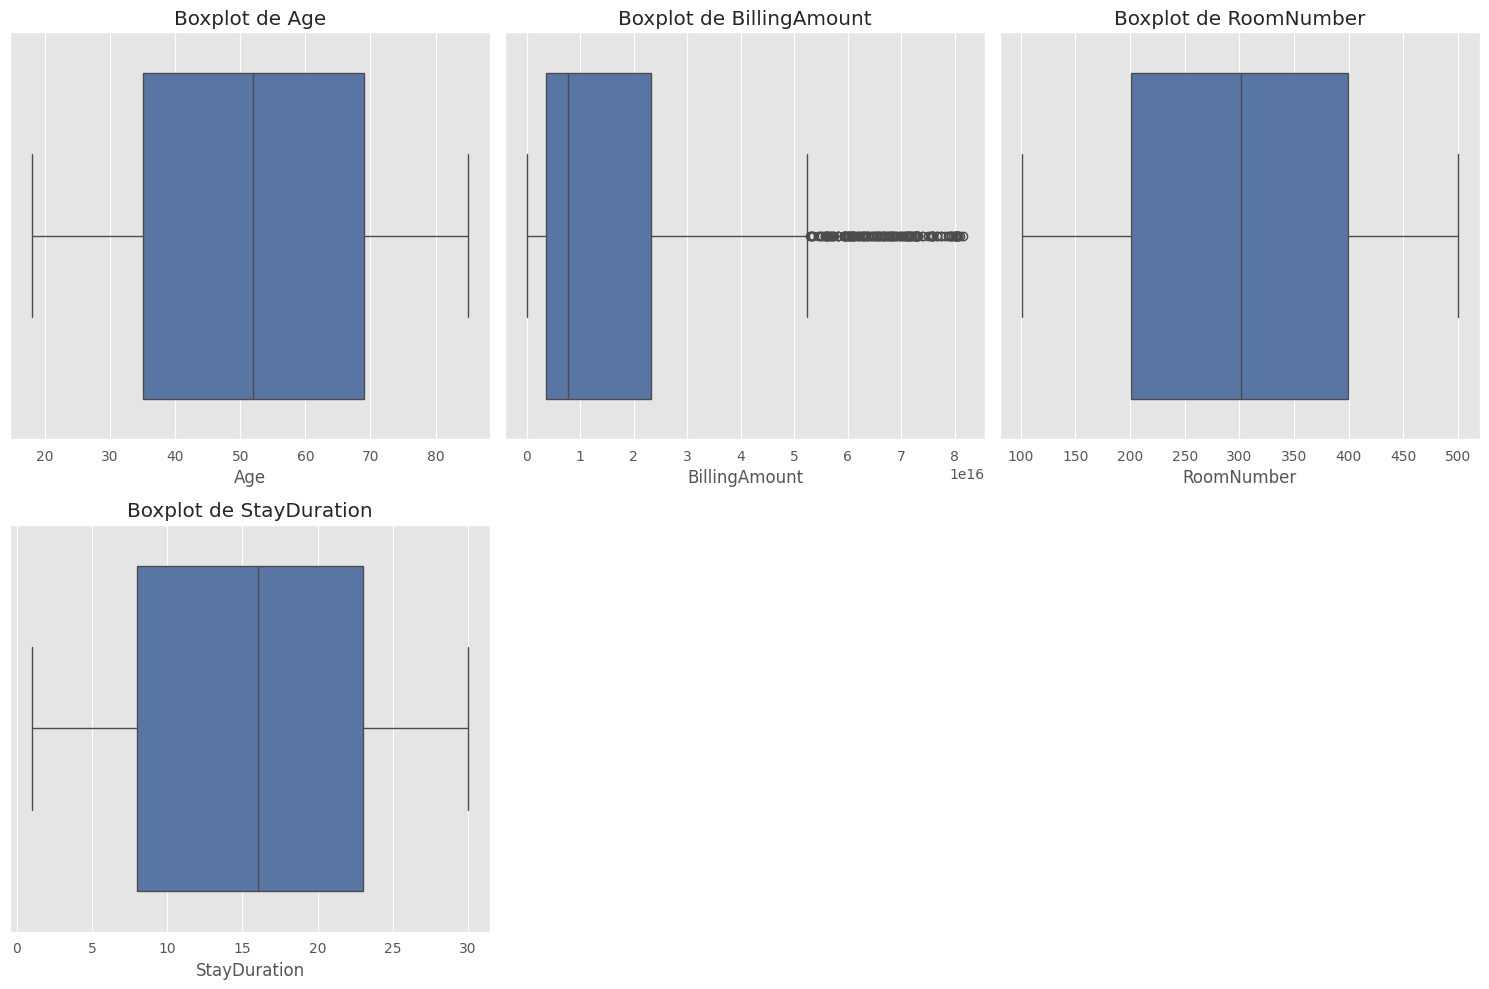

In [242]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculo el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configuro el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Genero y muestro los diagramas de caja, para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

# **Puedo visualizar una gran cantidad de outliers, en el Boxplot de Billing Amount.**

Considero las siguientes opciones:

1. **Investigar la causa de los Outliers:**

¿Representan errores de medición o son valores reales?
¿Hay algún patrón en los outliers?
Por ejemplo, ¿están asociados a ciertas condiciones médicas, tipos de admisión o rangos de edad?
¿Podrían deberse a factores externos, como cambios en los costos de los servicios médicos?

Al haberse generado el dataset de manera ficticia, los importes de 'Billing Amount', son muy desproporcionados.
Incluso había muchísimos casos de importes Negativos.
A los que he Normalizado.

2. **Considerar la transformación de la variable**:

Dado que "Billing Amount" representa un costo, es posible que una transformación logarítmica, ayude a reducir la influencia de los outliers y mejorar la distribución de los datos.

Probaré aplicar np.log(), a la columna "Billing Amount" y luego generar un nuevo boxplot, para ver si la cantidad de outliers se reduce.
3. Evaluar métodos robustos para el modelado:

Si decido mantener los outliers en el dataset, puedo considerar utilizar algoritmos de machine learning que sean menos sensibles a ellos, como Random Forest o Support Vector Machines.
Estos modelos pueden manejar mejor la presencia de outliers sin verse afectados significativamente en su rendimiento.

# Buscaré realizar una Transformación Logarítmica, de "Billing Amount".

* Puede ayudar a reducir la influencia de los outliers y mejorar la distribución de los datos.

In [243]:
# 1. Creo una nueva columna con la transformación logarítmica
df['Billing Amount Log'] = np.log(df['BillingAmount'])

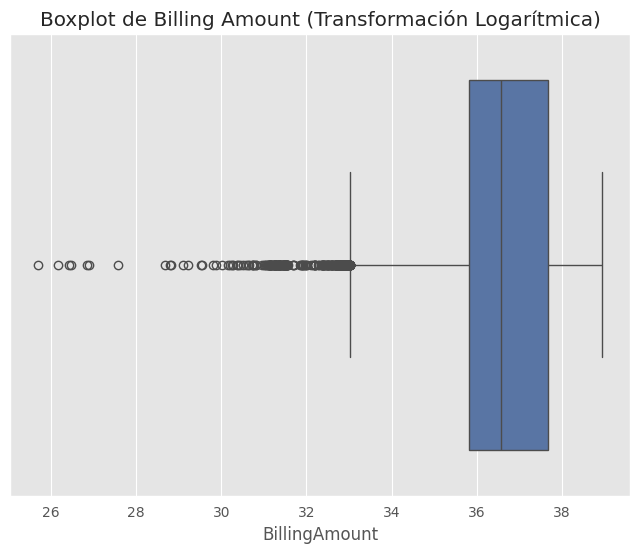

In [244]:
# 2. Genero el boxplot de la columna transformada
plt.figure(figsize=(8, 6))
sns.boxplot(x=np.log(df['BillingAmount'])) # Usamos la transformación que ya aplicamos
plt.title("Boxplot de Billing Amount (Transformación Logarítmica)")
plt.show()

**3. Evaluación:** Observo el nuevo boxplot y lo comparo con el original.

**Aún verifico una alta cantidad de outliers.**

Puedo intentar otras transformaciones o considerar utilizar un modelo robusto a outliers.

**4. Razonamiento:**

La transformación logarítmica comprime los valores altos, reduciendo la influencia de los outliers en la visualización. Esto permite una mejor apreciación de la distribución de los datos y facilita la identificación de patrones.

**Pasos adicionales:**

*Si la transformación logarítmica no es suficiente*, **puedo considerar otras transformaciones como la raíz cuadrada o la inversa, directamente sobre los datos originales.**

Si decido mantener los outliers, debo recordar elegir un modelo robusto a su presencia.



---

Ahora y primero que nada, necesito **Eliminar la Columna 'Billing Amount Log'**, de mi DataFrame df, dado que no ha dado resultado la Transformación Logarítmica.

Utilizaré el método drop().

Esto es para evitar problemas en el tratamiento del DataFrame.

In [245]:
df = df.drop('Billing Amount Log', axis=1)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         24999 non-null  object        
 1   Last Name          24999 non-null  object        
 2   Age                24999 non-null  int64         
 3   Gender             24999 non-null  object        
 4   BloodType          24999 non-null  object        
 5   MedicalCondition   24999 non-null  object        
 6   DateofAdmission    24999 non-null  datetime64[ns]
 7   Doctor             24999 non-null  object        
 8   Hospital           24999 non-null  object        
 9   InsuranceProvider  24999 non-null  object        
 10  BillingAmount      24999 non-null  int64         
 11  RoomNumber         24999 non-null  int64         
 12  AdmissionType      24999 non-null  object        
 13  DischargeDate      24999 non-null  datetime64[ns]
 14  Medica



---


# **1. Transformación de Raíz Cuadrada:**

In [247]:
# Creo una nueva columna con la transformación de raíz cuadrada
df['Billing Amount Sqrt'] = np.sqrt(df['BillingAmount'])

In [248]:
# 1. Calculo el rango intercuartílico (IQR)
Q1 = df['Billing Amount Sqrt'].quantile(0.25)
Q3 = df['Billing Amount Sqrt'].quantile(0.75)
IQR = Q3 - Q1

# 2. Defino los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# 3. Reemplazo los outliers con el límite correspondiente
df['Billing Amount Sqrt'] = np.where(
    df['Billing Amount Sqrt'] < limite_inferior,
    limite_inferior,
    np.where(
        df['Billing Amount Sqrt'] > limite_superior,
        limite_superior,
        df['Billing Amount Sqrt']
    )
)

**2. Nuevo boxplot:**

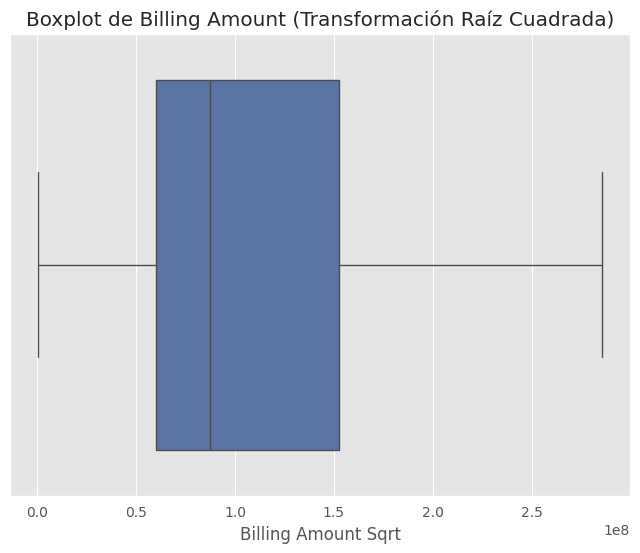

In [249]:
# Genero el boxplot de la nueva columna
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Billing Amount Sqrt'])
plt.title("Boxplot de Billing Amount (Transformación Raíz Cuadrada)")
plt.show()

# Explicación:

Quiero limpiar los outliers.

Cálculo del IQR: Calculamos el rango intercuartílico (IQR) para identificar la dispersión de los datos.
Definición de límites: Definimos los límites inferior y superior para detectar outliers, utilizando el IQR y un factor de 1.5.
Reemplazo de outliers: Reemplazamos los valores que caen fuera de estos límites, con el límite correspondiente.
Esto ayuda a reducir el impacto de los outliers en los modelos.

**3. Evaluación:**
Ahora comparo este nuevo boxplot, con el original y con el de la transformación logarítmica.
Evalúo cuál de las dos transformaciones, reduce mejor la influencia de los outliers y mejora la distribución de los datos para tu análisis.

Claramente, **la Transformación de Raíz Cuadrada**, ha sido la mejor opción.

**Razón por la cual, decido utilizar la columna 'Billing Amount Sqrt', en mis modelos de Machine Learning.**

Debo aplicarla también a los datos de prueba, antes de hacer predicciones.

**Razonamiento:**

Aplicar transformaciones consecutivas puede distorsionar la interpretación de los datos.

La raíz cuadrada, al igual que el logaritmo, comprime los valores altos, pero de forma menos drástica.

Es importante elegir la transformación que mejor se adapte a la naturaleza de los datos y al objetivo del análisis.

La elección de la transformación, puede afectar el rendimiento de los modelos de Machine Learning, que utilice posteriormente.

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   First Name           24999 non-null  object        
 1   Last Name            24999 non-null  object        
 2   Age                  24999 non-null  int64         
 3   Gender               24999 non-null  object        
 4   BloodType            24999 non-null  object        
 5   MedicalCondition     24999 non-null  object        
 6   DateofAdmission      24999 non-null  datetime64[ns]
 7   Doctor               24999 non-null  object        
 8   Hospital             24999 non-null  object        
 9   InsuranceProvider    24999 non-null  object        
 10  BillingAmount        24999 non-null  int64         
 11  RoomNumber           24999 non-null  int64         
 12  AdmissionType        24999 non-null  object        
 13  DischargeDate        24999 non-

**Para comparar la media, mediana, desviación estándar, mínimo y máximo de una variable numérica, puedo crear una función en Python, que calcule estas estadísticas y las presente de forma organizada**.

In [251]:
 import numpy as np

def comparar_estadisticas(data):
  """
  Calcula y compara la media, mediana, desviación estándar, mínimo y máximo de un conjunto de datos.

  Args:
    data: Un array de NumPy o una lista de valores numéricos.

  Returns:
    Un diccionario con las estadísticas calculadas.
  """

  media = np.mean(data)
  mediana = np.median(data)
  desviacion_estandar = np.std(data)
  minimo = np.min(data)
  maximo = np.max(data)

  return {
      "media": media,
      "mediana": mediana,
      "desviacion_estandar": desviacion_estandar,
      "minimo": minimo,
      "maximo": maximo
  }

# Ejemplo de uso con la columna transformada
datos = df['Billing Amount Sqrt']  # Usamos la columna con la transformación de raíz cuadrada
estadisticas = comparar_estadisticas(datos)

for key, value in estadisticas.items():
  print(f"{key}: {value}")

media: 104341652.99176972
mediana: 87192721.6204245
desviacion_estandar: 56925661.4693082
minimo: 379792.566718992
maximo: 285554835.62672704


**En el Dataset, tenía varios valores negativos. Los he normalizado. Trabajando sobre el mismo.**



---


# **Análisis Exploratorio de Datos (EDA)**

**Análisis Univariado**

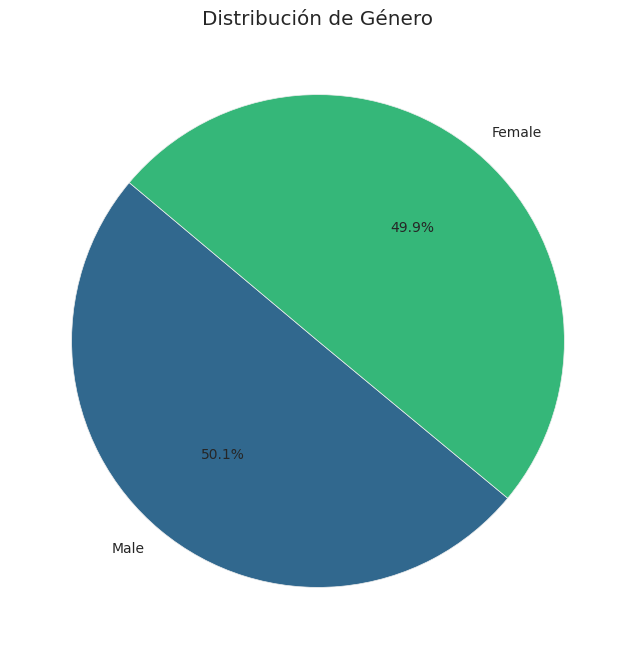

In [252]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))

plt.title('Distribución de Género')

plt.show()

**Distribución de las variables numéricas "Age" y "Billing Amount" en el DataFrame:**

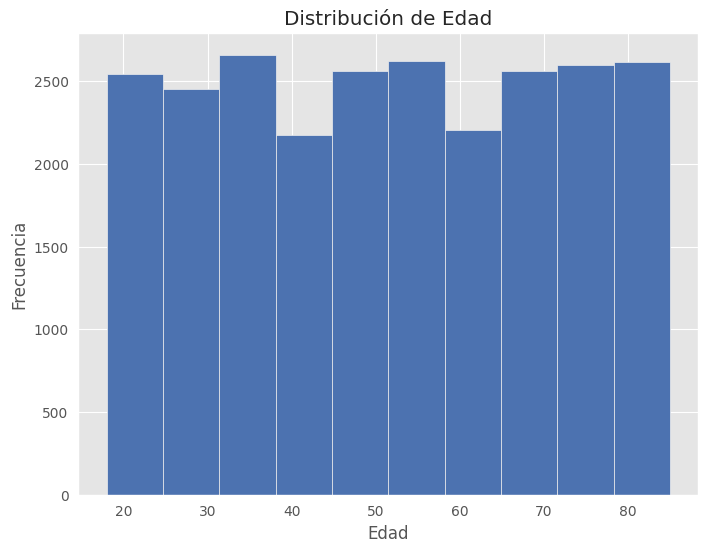

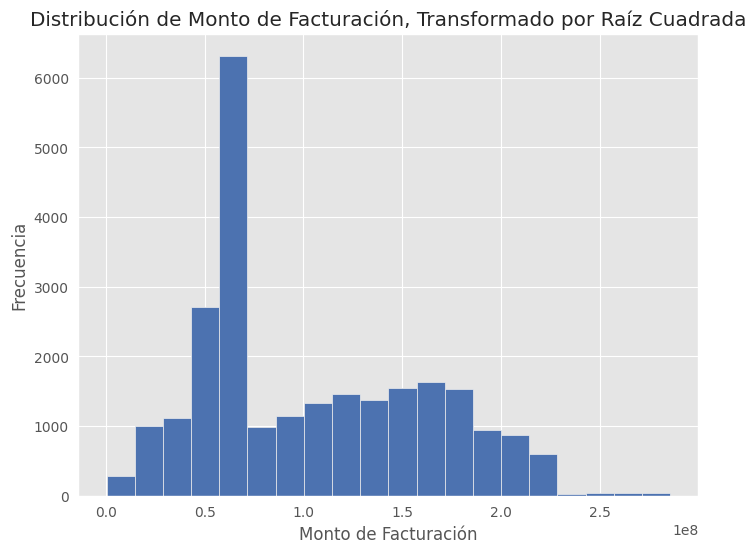

In [253]:
import matplotlib.pyplot as plt

# Histograma para la variable "Age"
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
plt.hist(df['Age'], bins=10)  # Ajusta el número de bins según tus necesidades
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')
plt.show()

# Histograma para la variable "Billing Amount Sqrt"
plt.figure(figsize=(8, 6))
plt.hist(df['Billing Amount Sqrt'], bins=20)
plt.xlabel('Monto de Facturación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Monto de Facturación, Transformado por Raíz Cuadrada')
plt.show()

**Análisis Bivariado**

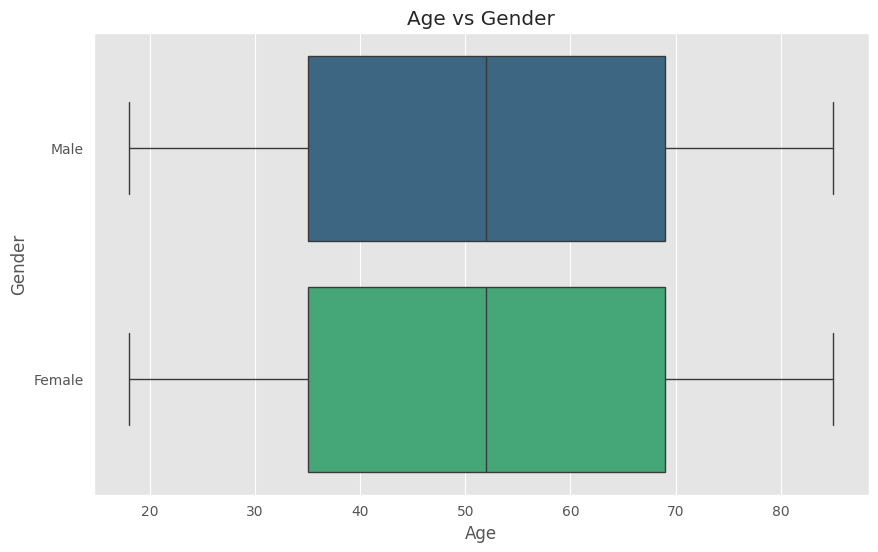

In [254]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Gender', data=df, hue='Gender', palette="viridis")
plt.title('Age vs Gender')
plt.show()

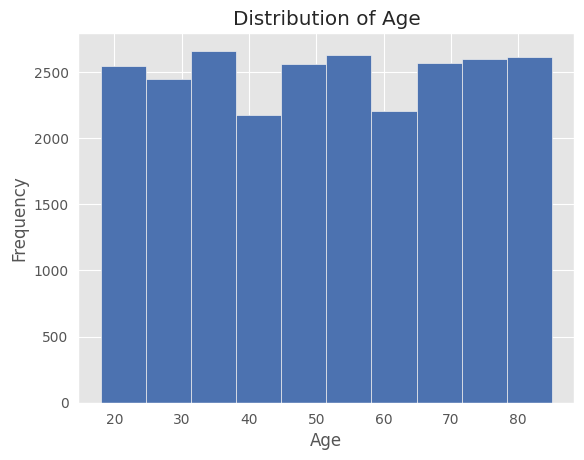

In [255]:
# Distribución por Edad
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Análisis Multivariado**

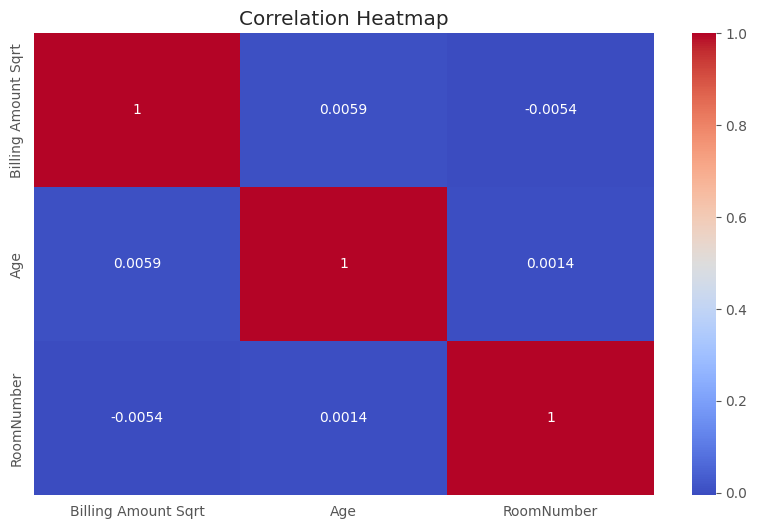

In [256]:
correlation_matrix = df[['Billing Amount Sqrt', 'Age', 'RoomNumber']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Interpretación del Mapa de Calor:**

Colores: Los colores en el mapa de calor representan la fuerza y la dirección de la correlación.
Los colores cálidos (como el rojo) indican una correlación positiva, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
Los colores fríos (como el azul) indican una correlación negativa, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.
Los colores cercanos al blanco indican una correlación débil o nula.
Números: Los números en cada celda representan el coeficiente de correlación, que varía entre -1 y 1.
Un coeficiente de 1 indica una correlación positiva perfecta.
Un coeficiente de -1 indica una correlación negativa perfecta.
Un coeficiente de 0 indica que no hay correlación.
Análisis del Mapa de Calor:

Basándome en el mapa de calor compartido, parece que:

No hay una correlación fuerte entre ninguna de las variables. Los coeficientes de correlación son relativamente bajos, lo que sugiere que no hay una relación lineal fuerte, entre "Billing Amount Sqtr", "Age" y "Room Number".

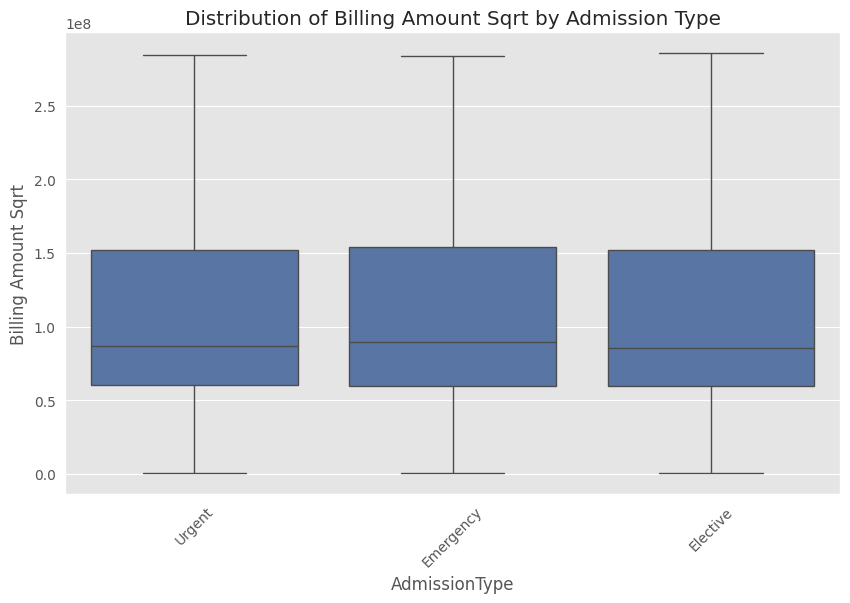

In [257]:
# Creamos un boxplot, para comparar la distribución del "Billong Amount Sqrt",
# (Monto de Facturación con Transformación de Raíz Cuadrada), entre los diferentes tipos de admisión,
#"Admision Type."
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'AdmissionType', y='Billing Amount Sqrt', data=df)
plt.xlabel('AdmissionType')
plt.ylabel('Billing Amount Sqrt')
plt.title('Distribution of Billing Amount Sqrt by Admission Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Analizando el boxplot, se puede observar:
1. Diferencias en la mediana:

La mediana del "Billing Amount Sqrt" para las admisiones de "Emergency" parece ser ligeramente más alta que para los otros tipos de admisión. Esto sugiere que, en promedio, los costos de facturación tienden a ser mayores para las admisiones de emergencia.
Las admisiones "Elective" y "Urgent" tienen medianas similares, lo que indica que los costos promedio de facturación para estos tipos de admisión son comparables.
2. Dispersión de los datos:

La caja para las admisiones de "Emergency", es más grande que las cajas para los otros tipos de admisión, lo que indica una mayor variabilidad en los costos de facturación, para este tipo de admisión.
Las admisiones "Elective" y "Urgent" tienen cajas de tamaño similar, lo que sugiere una variabilidad similar en los costos de facturación.
3. Valores atípicos:

Al realizar la Transformación por Raíz Cuadrada, se han eliminado los Outliers.

4. Patrones generales:

En general, parece haber una tendencia a que los costos de facturación, sean más altos para las admisiones de "Emergency", en comparación con los otros tipos de admisión. Sin embargo, la variabilidad en los costos es mayor para las admisiones de "Emergency", lo que significa que hay una gama más amplia de costos posibles.

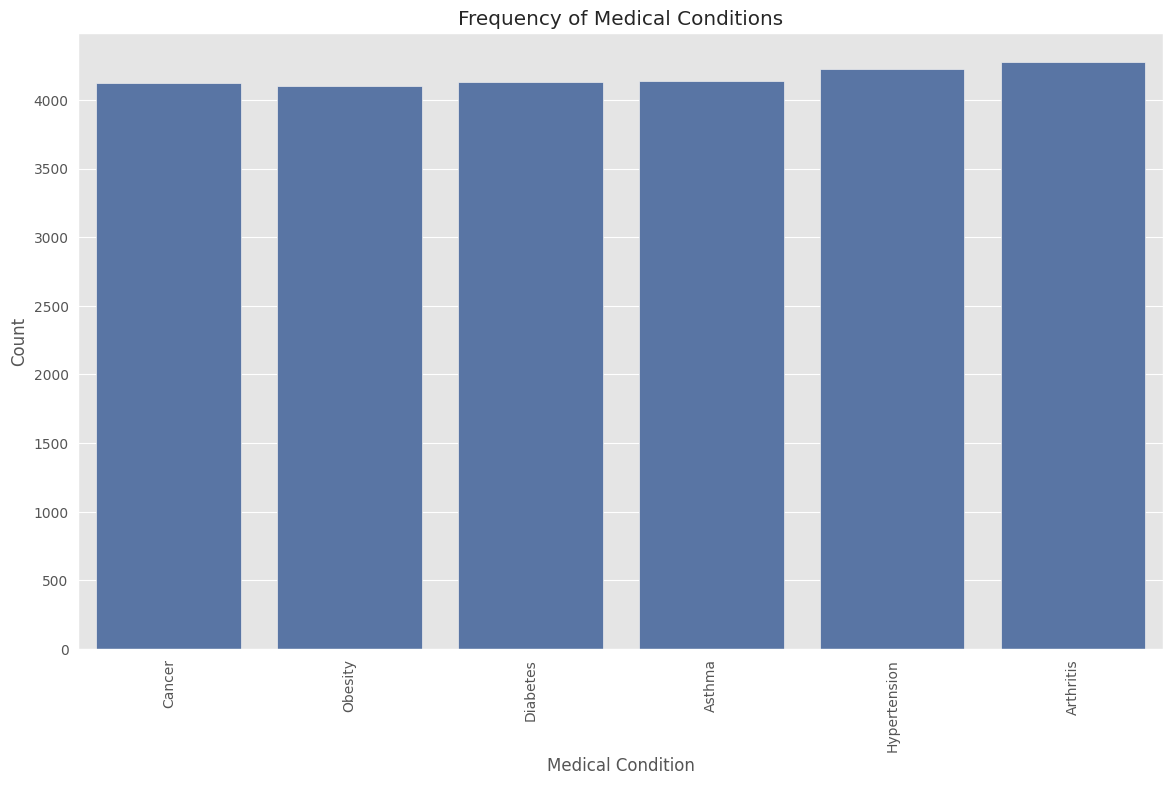

In [258]:
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
sns.countplot(x='MedicalCondition', data=df)
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Frequency of Medical Conditions')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

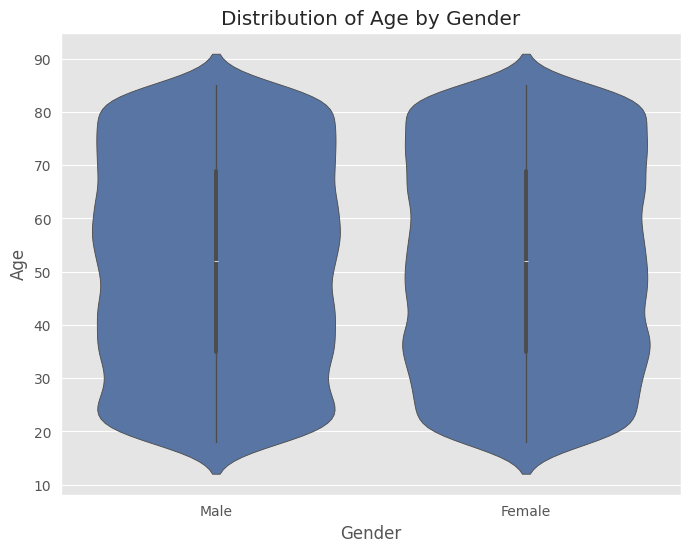

In [259]:
# Creo un gráfico de violín (violinplot), para visualizar la distribución de la edad, según el género

plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Age', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()

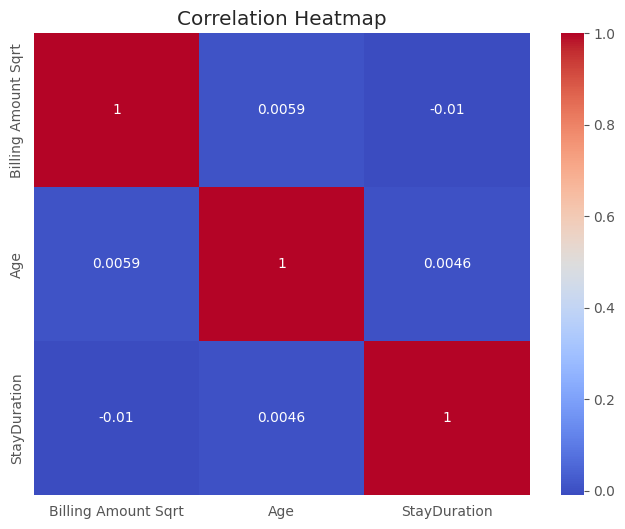

In [260]:
correlation_matrix = df[['Billing Amount Sqrt', 'Age', 'StayDuration']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Quiero comparar "Medical Condition", por "Gender" y "Age".

Condición Médica, en relación al Género y a la Edad.

Gráfico de barras agrupadas:

Primero, agrupo los datos por "Gender", "Medical Condition" y calculo el promedio de edad para cada grupo.


In [261]:
grouped_data = df.groupby(['Gender', 'MedicalCondition'])['Age'].mean().reset_index()

Luego creo el gráfico de barras:

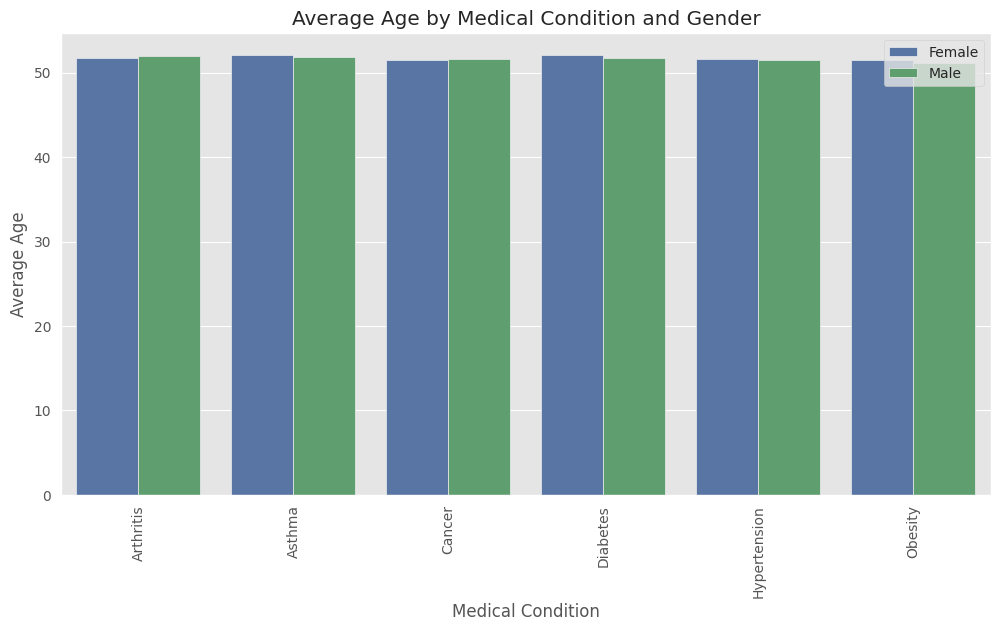

In [262]:
plt.figure(figsize=(12, 6))
sns.barplot(x='MedicalCondition', y='Age', hue='Gender', data=grouped_data)
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.title('Average Age by Medical Condition and Gender')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Analizando el gráfico de barras agrupadas, puedo observar lo siguiente:

1. Diferencias en la edad promedio por género y condición médica:

Artritis: La edad promedio de las mujeres con artritis, es ligeramente mayor que la de los hombres con la misma condición.
Cáncer: La edad promedio de los hombres con cáncer, es ligeramente mayor que la de las mujeres con cáncer.
Diabetes: La edad promedio de las mujeres con diabetes, es ligeramente mayor que la de los hombres con diabetes.
Enfermedad cardíaca: La edad promedio de los hombres con enfermedad cardíaca, es ligeramente mayor que la de las mujeres con la misma condición.
Hipertensión: La edad promedio de las mujeres con hipertensión, es ligeramente mayor que la de los hombres con hipertensión.
2. Patrones generales:

En general, parece haber una ligera tendencia a que las mujeres tengan una edad promedio ligeramente mayor que los hombres, para la mayoría de las condiciones médicas, excepto para el cáncer y la enfermedad cardíaca.
Las condiciones médicas que afectan principalmente a personas mayores, como la artritis y la hipertensión, muestran una mayor diferencia en la edad promedio entre géneros.
3. Conclusiones:

Aunque las diferencias en la edad promedio entre géneros no son muy pronunciadas, el gráfico sugiere que podría haber algunas variaciones en la edad de inicio o diagnóstico de ciertas condiciones médicas según el género.

Finalmente armo el gráfico de dispersión con codificación de color:

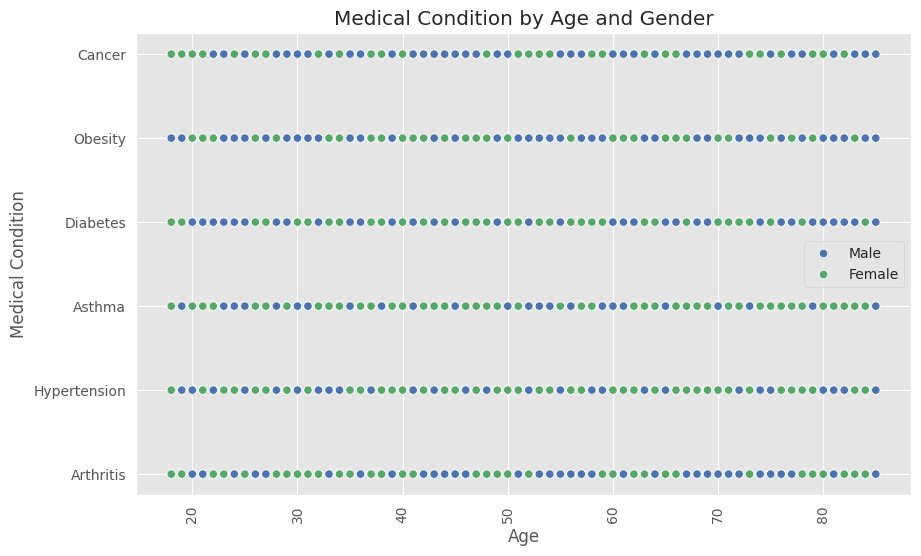

In [263]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MedicalCondition', hue='Gender', data=df)
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.title('Medical Condition by Age and Gender')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Analizando el gráfico de dispersión, puedo observar lo siguiente:

1. Distribución de las condiciones médicas:

Cáncer: Parece ser más frecuente en personas mayores, especialmente a partir de los 50 años, tanto en hombres como en mujeres.
Enfermedad cardíaca: También muestra una mayor incidencia en personas mayores, pero con una ligera concentración en hombres a partir de los 40 años.
Diabetes: Se distribuye de manera más uniforme a lo largo de las edades, aunque hay una ligera tendencia a aumentar su frecuencia en personas mayores.
Hipertensión: Se observa una mayor concentración en personas mayores, tanto en hombres como en mujeres.
2. Tendencias por edad:

En general, las condiciones médicas parecen ser más frecuentes en personas mayores, lo que sugiere que la edad es un factor de riesgo importante.
No se observan diferencias significativas en las tendencias por edad entre hombres y mujeres, aunque la enfermedad cardíaca parece ser ligeramente más común en hombres a partir de los 40 años.
3. Valores atípicos:

Hay algunos puntos que se alejan del patrón general, especialmente en el caso del cáncer. Estos valores atípicos podrían representar casos especiales que requieren una investigación más profunda.
4. Interacción entre variables:

No parece haber una interacción clara entre la edad, la condición médica y el género, aunque la enfermedad cardíaca muestra una ligera tendencia a ser más común en hombres a partir de los 40 años.

**Conclusiones:**

En general, el gráfico sugiere que la edad es un factor de riesgo importante para las condiciones médicas analizadas. Sin embargo, no se observan diferencias significativas, en las tendencias por edad entre hombres y mujeres. La enfermedad cardíaca, parece ser ligeramente más común en hombres, a partir de los 40 años.

# Conclusiones del EDA


---



# Codificación de Variables Categóricas

In [264]:
df.columns

Index(['First Name', 'Last Name', 'Age', 'Gender', 'BloodType',
       'MedicalCondition', 'DateofAdmission', 'Doctor', 'Hospital',
       'InsuranceProvider', 'BillingAmount', 'RoomNumber', 'AdmissionType',
       'DischargeDate', 'Medication', 'TestResults', 'StayDuration',
       'Billing Amount Sqrt'],
      dtype='object')

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   First Name           24999 non-null  object        
 1   Last Name            24999 non-null  object        
 2   Age                  24999 non-null  int64         
 3   Gender               24999 non-null  object        
 4   BloodType            24999 non-null  object        
 5   MedicalCondition     24999 non-null  object        
 6   DateofAdmission      24999 non-null  datetime64[ns]
 7   Doctor               24999 non-null  object        
 8   Hospital             24999 non-null  object        
 9   InsuranceProvider    24999 non-null  object        
 10  BillingAmount        24999 non-null  int64         
 11  RoomNumber           24999 non-null  int64         
 12  AdmissionType        24999 non-null  object        
 13  DischargeDate        24999 non-

# **MODELO A APLICAR**

Quiero predecir **"Billing Amount Sqrt"**, que es una variable numérica continua, por lo que empezaré con un modelo de **REGRESIÓN LINEAL**.

# **Selección de Características** - **(Feature Selection)**

**Selección de variable objetivo y variables independientes**

** Voy a cambiar la "Variable Objetivo", a "Costo del Servicio del Hospital", (Transformado por la Raíz Cuadrada) o directamente "Billing Amount Sqtr".**

# Modelo de Regresión Lineal

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Calculo la raíz cuadrada de 'Billing Amount'
df['Billing Amount Sqrt'] = df['BillingAmount'] ** 0.5

# 2. Target Encoding for Categorical Variables
categorical_cols = ['First Name', 'Last Name', 'MedicalCondition', 'Gender', 'BloodType',
                    'AdmissionType', 'TestResults', 'Doctor', 'Hospital',
                    'InsuranceProvider', 'Medication']

for col in categorical_cols:
    if col in df.columns:
        target_means = df.groupby(col)['Billing Amount Sqrt'].mean()
        df[col + '_target_encoded'] = df[col].map(target_means)

# 3. Definir objetivo y variables predictoras
y = df['Billing Amount Sqrt']

# Eliminar columnas originales y codificadas
columns_to_drop = ['Age', 'RoomNumber', 'BillingAmount', 'StayDuration']
columns_to_drop += categorical_cols
X = df.drop(columns_to_drop, axis=1)

# 4. Convertir columnas de marca de tiempo a numéricas (si las hay)
for col in X.select_dtypes(include=['datetime']):
    X[col] = X[col].apply(lambda t: t.timestamp() if pd.notna(t) else t)

# 5. Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Crear y entrenar el Modelo de Regresión Lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# 7. Realizar predicciones en los datos de prueba
y_pred = model_linear.predict(X_test)

# 8. Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 9. Imprimir los resultados
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1.9537515702494622e-15
Raíz del error cuadrático medio (RMSE): 4.42012620888755e-08
Error absoluto medio (MAE): 3.5226593414942423e-08
Coeficiente de determinación (R^2): 1.0


In [269]:
categorical_cols = ['First Name', 'Last Name', 'MedicalCondition', 'Gender', 'BloodType',
                    'AdmissionType', 'TestResults', 'Doctor', 'Hospital',
                    'InsuranceProvider', 'Medication']

In [270]:
df.columns

Index(['First Name', 'Last Name', 'Age', 'Gender', 'BloodType',
       'MedicalCondition', 'DateofAdmission', 'Doctor', 'Hospital',
       'InsuranceProvider', 'BillingAmount', 'RoomNumber', 'AdmissionType',
       'DischargeDate', 'Medication', 'TestResults', 'StayDuration',
       'Billing Amount Sqrt', 'First Name_target_encoded',
       'Last Name_target_encoded', 'MedicalCondition_target_encoded',
       'Gender_target_encoded', 'BloodType_target_encoded',
       'AdmissionType_target_encoded', 'TestResults_target_encoded',
       'Doctor_target_encoded', 'Hospital_target_encoded',
       'InsuranceProvider_target_encoded', 'Medication_target_encoded'],
      dtype='object')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   First Name                        24999 non-null  object        
 1   Last Name                         24999 non-null  object        
 2   Age                               24999 non-null  int64         
 3   Gender                            24999 non-null  object        
 4   BloodType                         24999 non-null  object        
 5   MedicalCondition                  24999 non-null  object        
 6   DateofAdmission                   24999 non-null  datetime64[ns]
 7   Doctor                            24999 non-null  object        
 8   Hospital                          24999 non-null  object        
 9   InsuranceProvider                 24999 non-null  object        
 10  BillingAmount                     24999 non-nu

In [272]:
# Variables independientes
X.columns

Index(['DateofAdmission', 'DischargeDate', 'Billing Amount Sqrt',
       'First Name_target_encoded', 'Last Name_target_encoded',
       'MedicalCondition_target_encoded', 'Gender_target_encoded',
       'BloodType_target_encoded', 'AdmissionType_target_encoded',
       'TestResults_target_encoded', 'Doctor_target_encoded',
       'Hospital_target_encoded', 'InsuranceProvider_target_encoded',
       'Medication_target_encoded'],
      dtype='object')

In [273]:
# Variable dependiente
y.sample(10)

,Billing Amount Sqrt
350,1.003837e+08
2371,6.947032e+07
11679,1.528026e+08
6429,1.765223e+08
1896,1.468683e+08
5551,1.926841e+08
2325,2.146263e+07
21107,6.587154e+07
13704,5.929243e+07
8183,1.042429e+08


# Árbol de Decisión

In [274]:
from sklearn.tree import DecisionTreeRegressor

# Creo y entreno el modelo de árbol de decisión
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Realizo predicciones en los datos de prueba
y_pred_tree = model_tree.predict(X_test)

# Evalúo el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nÁrbol de Decisión:")
print("Error cuadrático medio (MSE):", mse_tree)
print("Coeficiente de determinación (R^2):", r2_tree)


Árbol de Decisión:
Error cuadrático medio (MSE): 6733923350.296548
Coeficiente de determinación (R^2): 0.9999979132733156


# Bosque Aleatorio

In [275]:
from sklearn.ensemble import RandomForestRegressor

# Creo y entreno el modelo de bosque aleatorio
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar el número de árboles (n_estimators)
model_forest.fit(X_train, y_train)

# Realizo predicciones en los datos de prueba
y_pred_forest = model_forest.predict(X_test)

# Evalúo el modelo
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\nBosque Aleatorio:")
print("Error cuadrático medio (MSE):", mse_forest)
print("Coeficiente de determinación (R^2):", r2_forest)


Bosque Aleatorio:
Error cuadrático medio (MSE): 2297776573.853951
Coeficiente de determinación (R^2): 0.999999287958677


# EL MSE, al igual que con el Árbol de Decisión, sigue siendo bastante alto.

Posibles causas: Outliers y Complejidad del Modelo.
Recomendaciones:
1. Explorar outliers,
2. Ajuste de hiperparámetros y
3. **Validación Cruzada. Implementaré ésta última***

# Validación Cruzada (k-fold cross-validation)

In [276]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 'df' está cargado y los outliers han sido limpiados.

# 2. Target Encoding para variables categóricas
categorical_cols = ['First Name', 'Last Name', 'MedicalCondition', 'Gender', 'BloodType',
                    'AdmissionType', 'TestResults', 'Doctor', 'Hospital',
                    'InsuranceProvider', 'Medication']

for col in categorical_cols:
    if col in df.columns:
        target_means = df.groupby(col)['Billing Amount Sqrt'].mean()
        df[col + '_target_encoded'] = df[col].map(target_means)

# 3. Defino objetivo y variables predictoras
y = df['Billing Amount Sqrt']

# Elimino las columnas categóricas originales y otras innecesarias
columns_to_drop = ['Age', 'RoomNumber', 'BillingAmount', 'StayDuration']
columns_to_drop += categorical_cols
X = df.drop(columns_to_drop, axis=1)

# 4. Convertir columnas de marca de tiempo a numéricas (si las hay)
for col in X.select_dtypes(include=['datetime']):
    X[col] = X[col].apply(lambda t: t.timestamp() if pd.notna(t) else t)

# Validación cruzada (k-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define 5 pliegues

resultados_linear = []
resultados_tree = []
resultados_forest = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Regresión Lineal
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    y_pred_linear = model_linear.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    resultados_linear.append([mse_linear, r2_linear])

    # Árbol de Decisión
    model_tree = DecisionTreeRegressor(random_state=42)
    model_tree.fit(X_train, y_train)
    y_pred_tree = model_tree.predict(X_test)
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    r2_tree = r2_score(y_test, y_pred_tree)
    resultados_tree.append([mse_tree, r2_tree])

    # Bosque Aleatorio
    model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
    model_forest.fit(X_train, y_train)
    y_pred_forest = model_forest.predict(X_test)
    mse_forest = mean_squared_error(y_test, y_pred_forest)
    r2_forest = r2_score(y_test, y_pred_forest)
    resultados_forest.append([mse_forest, r2_forest])

# Calculo las métricas promedio para cada modelo
resultados_linear = pd.DataFrame(resultados_linear, columns=['MSE', 'R^2'])
resultados_tree = pd.DataFrame(resultados_tree, columns=['MSE', 'R^2'])
resultados_forest = pd.DataFrame(resultados_forest, columns=['MSE', 'R^2'])

print("Regresión Lineal:")
print(resultados_linear.mean())
print("\nÁrbol de Decisión:")
print(resultados_tree.mean())
print("\nBosque Aleatorio:")
print(resultados_forest.mean())

Regresión Lineal:
MSE    4.657756e-15
R^2    1.000000e+00
dtype: float64

Árbol de Decisión:
MSE    5.983136e+09
R^2    9.999982e-01
dtype: float64

Bosque Aleatorio:
MSE    3.620300e+09
R^2    9.999989e-01
dtype: float64


**Escalado de Características:**

In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Evaluación del Modelo:**

In [278]:
# Comparo si son iguales
X_train.columns.equals(X_test.columns)

all(X_train.columns.isin(X_test.columns)) and all(X_test.columns.isin(X_train.columns))

True

In [279]:
print(categorical_cols)

['First Name', 'Last Name', 'MedicalCondition', 'Gender', 'BloodType', 'AdmissionType', 'TestResults', 'Doctor', 'Hospital', 'InsuranceProvider', 'Medication']


Explicación:

Importamos Modelos Necesarios:
DecisionTreeClassifier y RandomForestClassifier, desde sklearn.
Diccionario de modelos: Creamos un diccionario para almacenar los modelos, facilitando su iteración y evaluación.
Iterar y evaluar: recorremos los modelos, los ajustamos a los datos de entrenamiento remuestreados, generamos predicciones, calculamos métricas y realizamos una validación cruzada.
Después de ejecutar este código, comparamos los resultados de los diferentes modelos:

Si todos los modelos obtienen puntuaciones perfectas: esto sugiere firmemente que hay problemas potenciales como fuga de datos o fuga de objetivos, y deberíamos investigarlos más a fondo.
Si algunos modelos tienen un peor rendimiento: esto indica que las puntuaciones perfectas pueden ser específicas de la regresión logística o deberse a un sobreajuste. Luego, puede centrarse en analizar esos modelos y ajustar sus hiperparámetros para mejorar la generalización.
Debemos recordar analizar cuidadosamente los resultados y tener en cuenta los posibles problemas que analizamos anteriormente.
Esta experimentación nos dará más confianza en los hallazgos y nos ayudará a construir un modelo más sólido y confiable.